In [49]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [50]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..', 'pplSIT', 'workflow'))
sys.path.append(os.path.join(os.getcwd(), '..', '..', 'pplSIT', 'workflow', 'utils'))

In [51]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py, json

from hdf import H5NAMES
from neuropixels import imro2numpy
from analysis.sessions import *

In [54]:
#source = '/home/sobolev/nevermind_ag-grothe/AG_Pecka/data/processed/'
source = '/home/sobolev/nevermind/AG_Pecka/data/processed/'

sessions = selected_013608
#sessions = selected_014393
    
sessions[:7]

['013608_ppcSIT_2025-01-06_13-20-52',
 '013608_ppcSIT_2025-01-07_08-47-27',
 '013608_ppcSIT_2025-01-07_15-38-23',
 '013608_ppcSIT_2025-01-09_09-09-55',
 '013608_ppcSIT_2025-01-10_09-25-04',
 '013608_ppcSIT_2025-01-13_14-01-40',
 '013608_ppcSIT_2025-01-14_10-20-14']

In [53]:
session = sessions[6]
#session = '013608_ppcSIT_2025-02-27_08-56-52'
#session = '013608_ppcSIT_2025-03-03_08-55-30'

session

'013608_ppcSIT_2025-01-14_10-20-14'

In [55]:
animal  = session.split('_')[0]
units_file = os.path.join(source, animal, session, 'units.h5')
phsl_file  = os.path.join(source, animal, session, 'analysis', 'sound_phase_lock.h5')

with h5py.File(units_file, 'r') as f:
    unit_names = [x for x in f]
    
positions = np.zeros([len(unit_names), 2])  # ML, DV in um
with h5py.File(units_file, 'r') as f:
    for i, unit_name in enumerate(unit_names):
        if 'anatomical_position' in f[unit_name]:
            positions[i] = np.array(f[unit_name]['anatomical_position'])
        elif 'kilosort_info' in f[unit_name]:
            u_infos = np.array(f[unit_name]['kilosort_info'])
            shank = int(unit_name.split('-')[0])
            depth = int(u_infos[4])
            positions[i] = np.array([(shank-1) * 250, depth])
        else:
            raise ValueError('No position information!')

In [66]:
# selection by MRL
with h5py.File(phsl_file, 'r') as f:
    conditions = [x for x in f]
    unit_ids   = [x for x in f[conditions[0]]]
    
MRL_mx = np.zeros([len(unit_ids), 2])  # MRL, p-value
with h5py.File(phsl_file, 'r') as snd_f:
    for i, unit_name in enumerate(unit_ids):
        MRL_tgt     = np.array(snd_f['tgt'][unit_name]['MRL_real'])
        pv_tgt      = np.array(snd_f['tgt'][unit_name]['p_value'])
        MRL_mx[i] = np.array([MRL_tgt, pv_tgt])
                              
# selection criteria
pv_min = 0.1
MRL_min = 0.05

idxs_MRL_high = np.where((MRL_mx[:, 0] > MRL_min) & (MRL_mx[:, 1] < pv_min))[0]
idxs_MRL_low  = np.where(MRL_mx[:, 1] > pv_min)[0]
print(f"{len(idxs_MRL_high)} units with phase locking selected")
print(f"{len(idxs_MRL_low)} units have kind of no phase locking")

36 units with phase locking selected
151 units have kind of no phase locking


In [71]:
special_units = {
    '013608_ppcSIT_2025-01-15_14-56-18': {
        'magenta': ['1-143', '1-157', '1-161', '1-518', '2-147', '2-460', '2-500', '3-501', '3-59', '3-8',\
              '4-232', '4-25', '4-368', '4-434'],
        'lime': ['2-166', '2-288', '3-258', '4-231'],
    },
    '013608_ppcSIT_2025-01-07_08-47-27': {
        'lime': ['2-43', '3-30', '4-10', '4-19']
    },
    '013608_ppcSIT_2025-01-27_09-00-20': {
        'lime': ['1-59', '1-155', '1-172', '1-193', '1-198', '1-199', '1-207', \
                 '2-101', '2-108', '2-111', '2-238', '2-282', '2-355', \
                 '3-441', '3-450', \
                 '4-31', '4-45', '4-55', '4-72', '4-86', '4-90', '4-142', '4-151', '4-159', \
                 '4-171', '4-176', '4-325', '4-328', '4-334', '4-411', '4-423'],
        'magenta': ['2-10', '2-43', '2-44', '2-51', '2-61', '2-76', '4-63']
    },
    '013608_ppcSIT_2025-01-23_08-46-51': {
        'lime': ['1-168', '1-176', '1-206', '2-155', '2-280', '3-144', '3-395', '3-501', '4-107', '4-233',\
                 '4-452', '4-504', '4-62'],
        #'magenta': ['1-151', '1-505', '2-444', '2-490', '3-7', '4-45'],
        'magenta': ['1-137', '1-167', '1-508', '1-517', '2-348', '2-534', '2-538', '3-434']
    },
    '013608_ppcSIT_2025-01-24_08-19-45': {
        'lime': ['1-16', '1-57', '1-84', '1-112', '1-146', '1-222', '1-253', '1-297', '1-308', '1-309', \
                 '1-323', '1-454', '1-496', '1-530', '1-533', '2-101', '2-117', '2-126', '2-150', \
                 '2-193', '2-263', '2-274', '2-287', '2-351', '2-377', '2-389', '2-391', '2-392', '2-401', \
                 '2-443', '2-463', '2-464', '2-465', '2-483', '2-498', '2-500', '3-152', '3-174', \
                 '3-186', '3-197', '3-234', '3-291', '3-315', '3-319', '3-356', '3-421', '3-460', \
                 '4-177', '4-199', '4-202', '4-229', '4-241', '4-383', '4-451', '4-526'],
        'magenta': ['2-31', '2-38', '2-71', '2-72', '2-78', '2-192', '3-92', '3-105', \
                    '3-106', '3-119', '3-120', '3-130', '3-131', '3-132', '3-133', '3-280', '4-11', \
                    '4-12', '4-23', '4-45', '4-54', '4-55', '4-64', '4-67', '4-81', '4-154']
    },
    '013608_ppcSIT_2025-01-07_15-38-23': {
        'magenta': ['2-3', '2-16', '2-53', '2-70', '2-80', '2-90', '3-41', '3-42', '3-109', '3-120', \
                    '3-134', '3-136', '3-137', '3-138', '3-247', '4-32', '4-34', '4-35', '4-44', '4-60', \
                    '4-73', '4-115', '4-124', '4-125', '4-158']
    },
    '013608_ppcSIT_2025-02-27_08-56-52': {
        'magenta': ['2-398', '2-485']
    },
    '013608_ppcSIT_2025-03-03_08-55-30': {'magenta': ['4-450'], 'lime': ['2-302', '2-388']},
    '014393_ppcSIT_2025-04-23_09-23-02': {'magenta': ['2-381']}
}

In [72]:
special_units[session] = {'magenta': [unit_ids[x] for x in idxs_MRL_high]}

In [73]:
coords_013608 = [[150, 825], [220, 750]]
extent_013608 = [-1000, 2000, 0, 4000]

coords_014393 = [[360, 1035], [220, 750]]
extent_014393 = [-1000, 2000, 0, 4000]

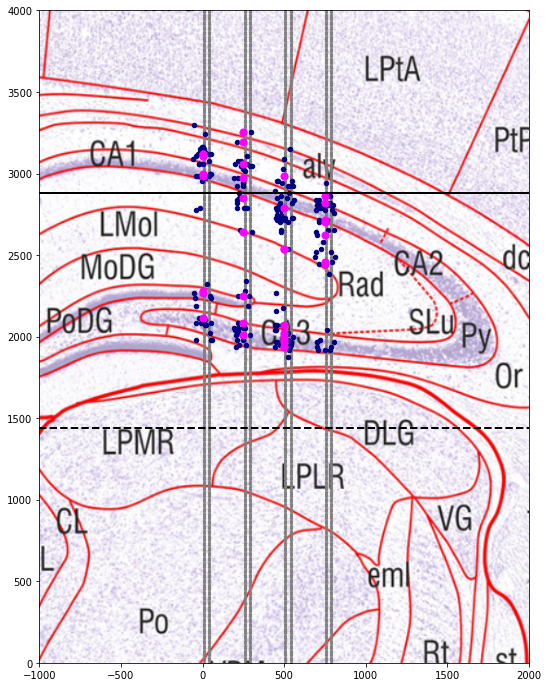

In [75]:
coords = coords_013608
extent = extent_013608
spread = 120
#sh_wid = 250
x_pos_oth = np.random.rand(len(positions)) * spread - spread/2

fig, ax = plt.subplots(1, 1, figsize=(11, 12))

# brain slice
x1, x2 = coords[0][0], coords[0][1]
y1, y2 = coords[1][0], coords[1][1]
img = plt.imread("plate30_right.png")
img_rot = np.rot90(img, k=3, axes=(0, 1))
img_rot_cut = img_rot[x1:x2, y1:y2]  # horizontal, vertical (from top left corner)
ax.imshow(img_rot_cut, extent=extent)

# probe sites
v_space = 15
x_coords = [[8, 40], [258, 290], [508, 540], [758, 790]]
y_coords = [v_space*x for x in range(640)]  # 15um vertical spacing, 640 channels each side
for shank in range(4):
    x_l = x_coords[shank][0]
    x_r = x_coords[shank][1]
    ax.scatter(x_l * np.ones(len(y_coords)), y_coords, s=5, color='grey')
    ax.scatter(x_r * np.ones(len(y_coords)), y_coords, s=5, color='grey')
    
# 96 channels lines
v_space = 15
for i in range(6):
    ls = '--' if i % 2 == 0 else '-'
    ax.axhline(v_space * (i+1) * 96, color='black', lw=2, ls=ls)
#ax.axhline(2200, color='lime', lw=2, ls=ls)
#ax.axhline(2700, color='lime', lw=2, ls=ls)

# IMRO
if False:
    imro_path = '/home/sobolev/nevermind/AG_Pecka/data/raw/013608/config/imro/HPC_AudThalamus.imro'
    imro_mx   = imro2numpy(imro_path)
    pos_mx    = np.zeros([len(imro_mx), 2])
    for i, record in enumerate(imro_mx):
        shank = int(record[1])
        idx_x = int(record[4] % 2)
        pos_mx[i] = x_coords[shank][idx_x], v_space * int(record[4] / 2)
    ax.scatter(pos_mx[:, 0], pos_mx[:, 1], color='orange')

# units
ax.scatter(positions[:, 0] + x_pos_oth, positions[:, 1], s=20, color='navy')
ax.set_xlim(extent[0], extent[1])
ax.set_ylim(extent[2], extent[3])

# selected units
if session in special_units:
    for color, selected_units in special_units[session].items():
        sel_unit_idxs  = []
        for unit_name in selected_units:
            sel_unit_idxs.append([i for i, u in enumerate(unit_names) if u == unit_name][0])
        sel_unit_idxs = np.array(sel_unit_idxs)

        ax.scatter(positions[sel_unit_idxs][:, 0], positions[sel_unit_idxs][:, 1], color=color, s=50)
        
#ax.scatter(positions[idxs_MRL][:, 0], positions[idxs_MRL][:, 1], color='cyan', s=100)

In [27]:
idxs_1 = np.where((positions[:, 0] < 50) & (positions[:, 1] > 2500) & (positions[:, 1] < 2800))[0]
idxs_2 = np.where((positions[:, 0] > 250) & (positions[:, 0] < 300) & (positions[:, 1] > 2180) & (positions[:, 1] < 2700))[0]
idxs_3 = np.where((positions[:, 0] > 750) & (positions[:, 0] < 800) & (positions[:, 1] > 2200) & (positions[:, 1] < 2600))[0]

idxs_sel = np.concatenate([idxs_1, idxs_2, idxs_3]).astype(np.int32)